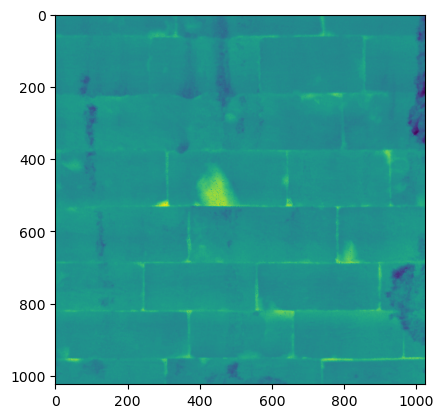

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#pic = Image.open("../data/loggingtest1/testsynth.tiff")
pic = Image.open("../data/wall1/raster.tiff")
picnp = np.array(pic)
plt.imshow(picnp)

In [15]:
from Blockfit import blockfit 
from PIL import Image
picoutnp = np.array(Image.open("../data/test4/results/picoutdepthUnetmobilenet_v2default.tiff"))
picoutfit = blockfit(picoutnp)


x,a
tensor(True)
False
end
x,a
tensor(True)
tensor(True)
x,a
tensor(True)
tensor(True)
x,a
tensor(True)
tensor(True)
x,a
tensor(True)
tensor(True)
x,a
tensor(True)
tensor(True)
x,a
tensor(True)
tensor(True)
x,a
tensor(True)
tensor(True)
x,a
tensor(True)
tensor(True)
x,a
tensor(True)
tensor(True)
x,a
tensor(False)
tensor(True)
start
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(False)
x,a
tensor(False)
tensor(F

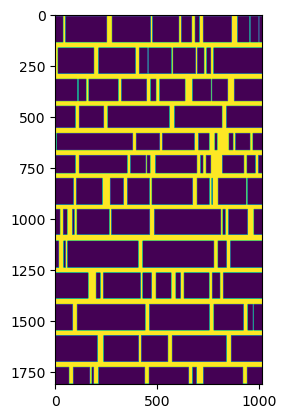

In [16]:
plt.imshow(picoutfit)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

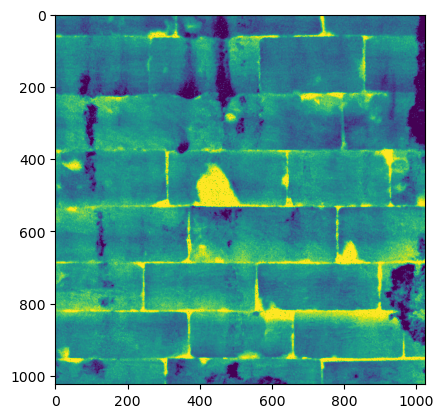

In [10]:
import numpy as np
import os
import albumentations as A
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import os

x = picnp
normalisationparam = 4        
x = ((x-x.mean())/(normalisationparam*np.std(x)))+0.5
x[x<0] = 0
x[x>1] = 1
x = x#/2
# (x-x.mean())/np.std(x)    
# maxinput = x.max()
# x = x/maxinput
plt.imshow(x)
picoutfit[1,:]

In [3]:
x.max()

1.0

In [4]:
x.min()

0.0

In [83]:
transparams = [
     A.GridDistortion (num_steps=5, p=0.8),
     A.RandomSizedCrop([64,1024], 256, 256, w2h_ratio = 1, p=1.0),
     A.HorizontalFlip(p=0.5),
     A.VerticalFlip(p=0.5),
     A.RandomBrightnessContrast(p=0.8, brightness_limit =0.5, contrast_limit = 0.5),
     A.GaussNoise(p=0.7, var_limit=[0,0.3]),
     A.ElasticTransform(p=0.8, alpha=500, sigma=40, alpha_affine=8),

]
transparamsv = [
    A.RandomCrop (256, 256, always_apply=True, p=1.0),
   # A.RandomSizedCrop(min_max_height=(64, 512), height=512, width=512, w2h_ratio=1.0, interpolation=1, always_apply=False, p=0.75),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
   # A.RandomBrightnessContrast(p=0.7),
   # A.GaussNoise(always_apply=False, p=0.3, var_limit=(5, 5)),
  #  A.RandomContrast(always_apply=False, p=0.3, limit=(-0.6, 0.6)),
   # A.RandomRotate90(always_apply=False, p=0.75)
   # A.CLAHE(p=1),

]


# im = Image.open("../data/test.tiff")
# imnp = np.array(im)
# ma = Image.open("../data/testmask.tiff")
# manp = np.array(ma)
transform1 = A.Compose(transparams)
transformed1 = transform1(image=x, mask=x)
xout = transformed1['image']
#y = transformed1['mask']




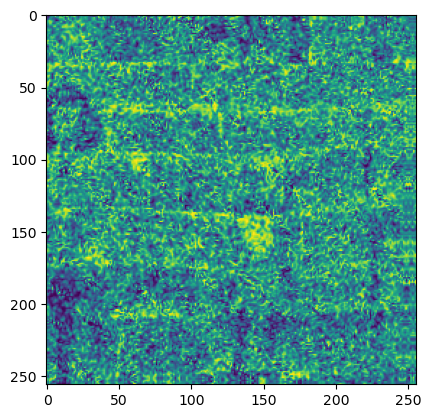

In [84]:
#xnp = np.array(x)
plt.imshow(xout)

In [85]:
xout.min()

0.0

In [8]:
xout.mean()

0.49123615

In [9]:
xout.max()

1.0

In [10]:
x.std()

0.18479367

In [11]:
sdfsdfsd

NameError: name 'sdfsdfsd' is not defined

In [ ]:
# pic = Image.open(test+testimage)
dim = 256
pic1 = pic.copy()
pic2 = pic.copy()
pic3 = pic.copy()
pic4 = pic.copy()
# dim = 512
w = pic.size[0]
nx = int(w/dim)
h = pic.size[1]
ny = int(h/dim)
i = 0

picpastenp1 = np.zeros((w,h))
picpaste1 = Image.new(mode = 'F',size=(w,h)) 
picpaste2 = Image.new(mode = 'F',size=(w,h))
picpaste3 = Image.new(mode = 'F',size=(w,h))
co_ords = np.zeros((2, nx*ny))


size = 256

if nx == w/dim:
    nxend = nx
else:
    nxend = nx+1
    
if ny == h/dim:
    nyend = ny
else:
    nyend = ny+1

for x in range(0, nxend):
    print(x)
    for y in range(0,nyend):
      print(y)
      left = int(x*dim)
      bottom = int(y*dim)
      right =int(dim*(1+x))
      top =int(dim*(1+y))
      box = (left,bottom,right,top)
      region = pic.crop(box)

    
      if left< 0:

        overlapleft = 0 - left
        end = max(dim,(2*overlapleft))
        copy = region.crop((overlapleft,0,end, dim))
        width = copy.size[0]
        mirrored = copy.transpose(0)
        noverlap = int(overlapleft/width)
        for a in range(1, noverlap+1):
            region.paste(mirrored,(end-width*(a+1),0,end-width*a,dim) )


      if right> w:


        overlapright = right - w
        start = max(0,dim-(2*overlapright))
        copy = region.crop((start,0,(dim-overlapright), dim))
        width = copy.size[0]
        mirrored = copy.transpose(0)
        noverlap = int(overlapright/width)
        for a in range(1, noverlap+1):
            region.paste(mirrored,(start+width*a,0,start+width*(1+a),dim) )



      if bottom< 0:

        overlapbottom = 0 - bottom
        end = max(dim,(2*overlapbottom))
        copy = region.crop((0,overlapbottom,dim,end))
        height = copy.size[1]
        mirrored = copy.transpose(1)
        noverlap = int(overlapbottom/height)
        for a in range(1, noverlap+1):
            region.paste(mirrored,(0,end-height*(a+1),dim,end-height*a) )

      if top> h:


        overlaptop = top - h
        start = max(0,dim-(2*overlaptop))
        copy = region.crop((0,start,dim,(dim-overlaptop)))
        height = copy.size[1]
        mirrored = copy.transpose(1)
        noverlap = int(overlaptop/height)
        for a in range(1, noverlap+1):
            region.paste(mirrored,(0,start+height*a,dim,start+height*(1+a)) )


In [ ]:
height

In [ ]:
overlaptop

In [ ]:
top

In [ ]:
h